# Predict Wind Turbine Outputs from Erosion Simulation Model

First select the datatable to read in.

In [1]:
import pandas as pd

data = pd.read_table('LHC220_ExpDataTable.txt',delimiter=',')

In [2]:
data.head()

,Wind_Direction,Wind_Speed,Air_Density,BldPitch1,BldPitch2,BldPitch3,LSShftFxa,LSShftFya,LSShftFza,LSShftMxa,...,Blade2Region4,Blade2Region5,Blade2Region6,Blade3Region1,Blade3Region2,Blade3Region3,Blade3Region4,Blade3Region5,Blade3Region6,ErosionClass
0,11.897727,14.243182,1.187972,5.820897,5.820897,5.820897,603.372645,-1.480176,-3.451978,4180.139509,...,0.187500,0.111364,0.075000,0.107386,0.008523,0.412500,0.278409,0.470455,0.865909,light_moderate
1,9.238636,15.865909,1.192983,9.475813,9.475813,9.475813,525.595751,-10.190943,4.547302,4180.073270,...,0.055682,0.915909,0.625000,0.110795,0.065341,0.426136,0.394318,0.229545,0.547727,moderate
2,9.920455,5.743182,1.268710,0.000000,0.000000,0.000000,282.630901,-22.377370,-8.900686,689.634370,...,0.092045,0.697727,0.338636,0.158523,0.182386,0.382955,0.492045,0.956818,0.761364,light_moderate
3,5.965909,18.184091,1.244210,14.057100,14.057100,14.057100,454.267286,-1.667238,5.415940,4180.156382,...,0.492045,0.034091,0.193182,0.240341,0.101705,0.226136,0.023864,0.147727,0.465909,light
4,0.579545,18.415909,1.230290,0.000000,0.000000,0.000000,971.123981,13.969798,-22.057260,3683.609280,...,0.112500,0.220455,0.334091,0.055114,0.133523,0.487500,0.071591,0.506818,0.765909,moderate


Now, we should try to predict one of the outputs given the experiment inputs.  For the first test, we will use as the experiment inputs: 
- `Wind_Direction`
- `Wind_Speed`
- `Air_Density`

We will try to predict `GenPwr`.

In [3]:
column_names = data.columns

In [17]:
print(column_names[154:160])

Index(['GenPwr', 'GenTq', 'BldPitch1_std', 'BldPitch2_std', 'BldPitch3_std',
       'LSShftFxa_std'],
      dtype='object')


- The index for `GenPwr` is 154
- The index for `Wind_Direction` is 0
- The index for `Wind_Speed` is 1
- The index for `Air_Density` is 2

In [5]:
import numpy as np
bigarray = data.to_numpy()
inputs = np.zeros((len(bigarray[:,0]),3))
inputs[:,0] = bigarray[:,0]
inputs[:,1] = bigarray[:,1]
inputs[:,2] = bigarray[:,2]

outputs = bigarray[:,154]
print(outputs)

[4999.96812997969 4999.98062802687 522.712154350883 5000.02483986877
 4312.01968442431 4999.99031401344 209.310482737073 2669.2104358694
 4999.9771910639 5000.01031088892 590.749039212623 1717.25058584596
 991.828558037805 4730.02374628964 3688.98406498985 944.03129198563
 1572.43040149977 318.141087330105 148.946133416654 0.153582398062803
 4999.97359787533 5000.01734104046 5000.00999843774 4999.99781284174
 4999.98187783159 1601.00984221215 55.9059037650367 1496.71770035932
 4571.32291829402 4137.2926105296 610.253179190751 539.697578503358
 778.266020934228 4999.99640681144 2119.68176847368 4345.65692860491
 4991.6402124668 1854.70348383065 1762.20559287611 628.492423058896
 238.648851741916 5000.01140446805 1575.74472738635 470.63015153882
 1159.28667395719 4999.98359631308 1281.1585689736 1788.3719731292
 4999.99500078113 3866.53585377285 4999.98500234338 91.3002546477113
 4999.99718793938 5000.00999843774 4999.98219028277 307.474472738634
 752.893860334323 1165.60318700203 1340.1

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# We will scale the inputs before trying to predict the outputs for best results;
# But in order to avoid data leaks, first we will split the data, then scale the training data
X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, test_size=0.15)
scaler = StandardScaler()
scaler.fit(X_train)

X_train_sc = scaler.transform(X_train) # Transform the training data
X_test_sc = scaler.transform(X_test) # Use the transformer fit on training data for testing

# Now that the data is scaled, we can proceed to try to fit a GPE
# We will evaluate it on a scatter diagram, a QuantileQuantile plot, 
# and calculate the RMSE and the correlation coefficient

The upper bounds of the range parameters are 52.8145 53.52831 54.24429 
The initial values of range parameters are 1.05629 1.070566 1.084886 
Start of the optimization  1  : 
The number of iterations is  19 
 The value of the  marginal posterior  function is  -1595.611 
 Optimized range parameters are 0.4216715 0.6056379 10.09657 
 Optimized nugget parameter is 0 
 Convergence:  TRUE 
The initial values of range parameters are 0.6318138 0.640353 0.6489183 
Start of the optimization  2  : 
The number of iterations is  18 
 The value of the  marginal posterior  function is  -1595.611 
 Optimized range parameters are 0.4216715 0.6056379 10.09657 
 Optimized nugget parameter is 0 
 Convergence:  TRUE 


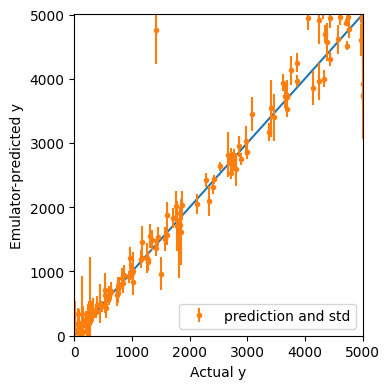

In [7]:
import numpy as np
from psimpy.emulator import ScalarGaSP
import matplotlib.pyplot as plt

# Select the model
emulator = ScalarGaSP(ndim=3,max_eval = 100,num_initial_values=2)

# Fit the model
emulator.train(design=X_train_sc, response=y_train)

# Validate the model
validation = emulator.loo_validate()

# Plot the validation
fig , ax = plt.subplots(figsize=(4,4))
y = y_train # for now y is made to be the training set
ax.set_xlabel('Actual y')
ax.set_ylabel('Emulator-predicted y')
ax.set_xlim(np.min(y)-1,np.max(y)+1)
ax.set_ylim(np.min(y)-1,np.max(y)+1)

_ = ax.plot([np.min(y)-1,np.max(y)+1], [np.min(y)-1,np.max(y)+1])
_ = ax.errorbar(y, validation[:,0], validation[:,1], fmt='.', linestyle='', label='prediction and std')
_ = plt.legend()
plt.tight_layout()

In [8]:
predicted_train = emulator.predict(X_train_sc)
predicted_test = emulator.predict(X_test_sc)

predict_train = predicted_train[:,0]
predict_test = predicted_test[:,0]

# Calculate R factor and mean-square-error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

error_training = np.sqrt(mean_squared_error(predict_train,y_train))
error_test = np.sqrt(mean_squared_error(predict_test,y_test))

corr_coef_train = r2_score(predict_train,y_train)
corr_coef_test = r2_score(predict_test,y_test)

print('RMSE training:',error_training)
print('RMSE testing:', error_test)
print('Correlation Coefficient training:',corr_coef_train)
print('Correlation Coefficient testing:', corr_coef_test)

RMSE training: 9.8515990216335e-05
RMSE testing: 938.4957291621215
Correlation Coefficient training: 0.9999999999999974
Correlation Coefficient testing: 0.7401965041534426


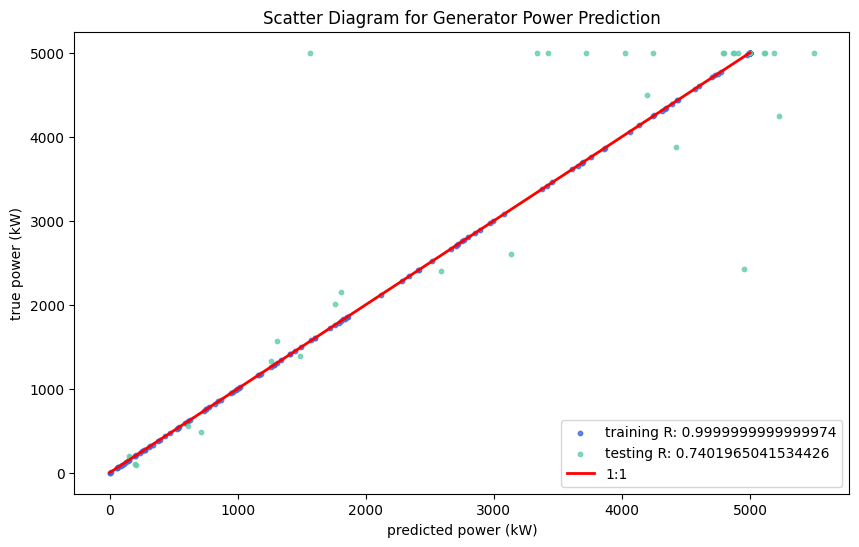

In [9]:
# Plot the Results
l1 = "training R: "+str(corr_coef_train)
l2 = "testing R: "+str(corr_coef_test)
fig, ax = plt.subplots(1,1,figsize=(10, 6))
ax.scatter(predict_train, y_train, color="royalblue", label=l1, s=10,alpha = 0.8)
ax.scatter(predict_test, y_test, color="mediumaquamarine", label=l2, s=10,alpha = 0.8)
ax.plot([y_train.min(),y_train.max()],[y_train.min(),y_train.max()],color = "red", label = "1:1", linewidth=2)
ax.set_xlabel("predicted power (kW)")
ax.set_ylabel("true power (kW)")
ax.set_title("Scatter Diagram for Generator Power Prediction")
ax.legend()
plt.show()

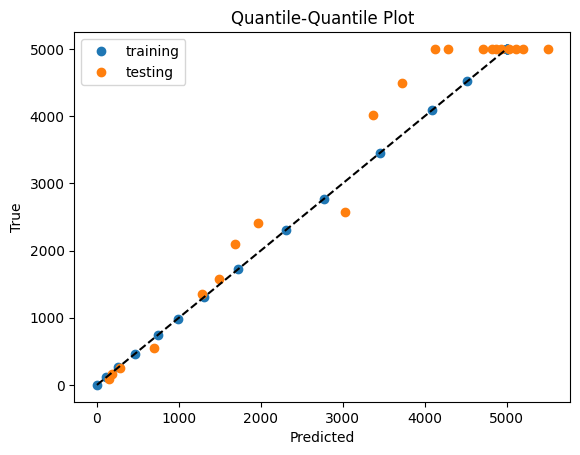

In [10]:
a = predict_train
b = y_train

c = predict_test
d = y_test

percs = np.linspace(0,100,21)
qn_a = np.percentile(a, percs)
qn_b = np.percentile(b, percs)
qn_c = np.percentile(c, percs)
qn_d = np.percentile(d, percs)

plt.plot(qn_a,qn_b, ls="", marker="o",label = "training")
plt.plot(qn_c,qn_d, ls="", marker="o",label = "testing")

x = np.linspace(np.min((qn_a.min(),qn_b.min())), np.max((qn_a.max(),qn_b.max())))
plt.plot(x,x, color="k", ls="--")
plt.title("Quantile-Quantile Plot")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.legend()
plt.show()

The Gaussian Process Emulator Appears to be functioning very well at predicting generator power from the `Wind_Direction`,`Wind_Speed`, and `Air_Density`.  We should see how the inclusion of erosion levels effects the results

In [16]:
print(column_names[615:660])

Index(['Blade1Region1', 'Blade1Region2', 'Blade1Region3', 'Blade1Region4',
       'Blade1Region5', 'Blade1Region6', 'Blade2Region1', 'Blade2Region2',
       'Blade2Region3', 'Blade2Region4', 'Blade2Region5', 'Blade2Region6',
       'Blade3Region1', 'Blade3Region2', 'Blade3Region3', 'Blade3Region4',
       'Blade3Region5', 'Blade3Region6', 'ErosionClass'],
      dtype='object')


The upper bounds of the range parameters are 7204.037 7126.335 7235.579 7303.044 7308.877 7235.333 7133.759 7140.385 7137.658 7089.448 7118.199 7152.48 7156.141 7101.463 7288.52 7205.346 7169.202 7128.231 7285.795 7133.671 7348.476 
The initial values of range parameters are 144.0807 142.5267 144.7116 146.0609 146.1775 144.7067 142.6752 142.8077 142.7532 141.789 142.364 143.0496 143.1228 142.0293 145.7704 144.1069 143.384 142.5646 145.7159 142.6734 146.9695 
Start of the optimization  1  : 
The number of iterations is  55 
 The value of the  marginal posterior  function is  -1712.241 
 Optimized range parameters are 389.7796 1.853921 162.8747 19.12489 10.40332 40.80688 83.4169 8.647552 99.58272 7089.448 7118.199 7152.48 7156.141 545.562 9.911333 7205.346 104.1121 13.27766 40.59129 25.82539 31.6322 
 Optimized nugget parameter is 0 
 Convergence:  TRUE 
The initial values of range parameters are 87.51981 86.57584 87.90302 88.72263 88.79349 87.90002 86.66603 86.74653 86.7134 86.12771 86.

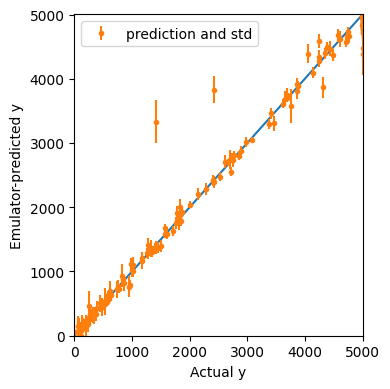

In [20]:
inputs = np.zeros((len(bigarray[:,1]),3+18))
bigarray = data.to_numpy()
inputs[:,0] = bigarray[:,0]
inputs[:,1] = bigarray[:,1]
inputs[:,2] = bigarray[:,2]
for i in range(18):
    inputs[:,3+i] = bigarray[:,615+i]


outputs = bigarray[:,154]

# We will scale the inputs before trying to predict the outputs for best results;
# But in order to avoid data leaks, first we will split the data, then scale the training data
X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, test_size=0.1)
scaler = StandardScaler()
scaler.fit(X_train)

X_train_sc = scaler.transform(X_train) # Transform the training data
X_test_sc = scaler.transform(X_test) # Use the transformer fit on training data for testing

# Now that the data is scaled, we can proceed to try to fit a GPE
# We will evaluate it on a scatter diagram, a QuantileQuantile plot, 
# and calculate the RMSE and the correlation coefficient

# Select the model
emulator = ScalarGaSP(ndim=len(inputs[0,:]),num_initial_values=2)

# Fit the model
emulator.train(design=X_train_sc, response=y_train)

# Validate the model
validation = emulator.loo_validate()

# Plot the validation
fig , ax = plt.subplots(figsize=(4,4))
y = y_train # for now y is made to be the training set
ax.set_xlabel('Actual y')
ax.set_ylabel('Emulator-predicted y')
ax.set_xlim(np.min(y)-1,np.max(y)+1)
ax.set_ylim(np.min(y)-1,np.max(y)+1)

_ = ax.plot([np.min(y)-1,np.max(y)+1], [np.min(y)-1,np.max(y)+1])
_ = ax.errorbar(y, validation[:,0], validation[:,1], fmt='.', linestyle='', label='prediction and std')
_ = plt.legend()
plt.tight_layout()

RMSE training: 0.00010237841156632434
RMSE testing: 184.16317412243205
Correlation Coefficient training: 0.9999999999999972
Correlation Coefficient testing: 0.9898366975221897


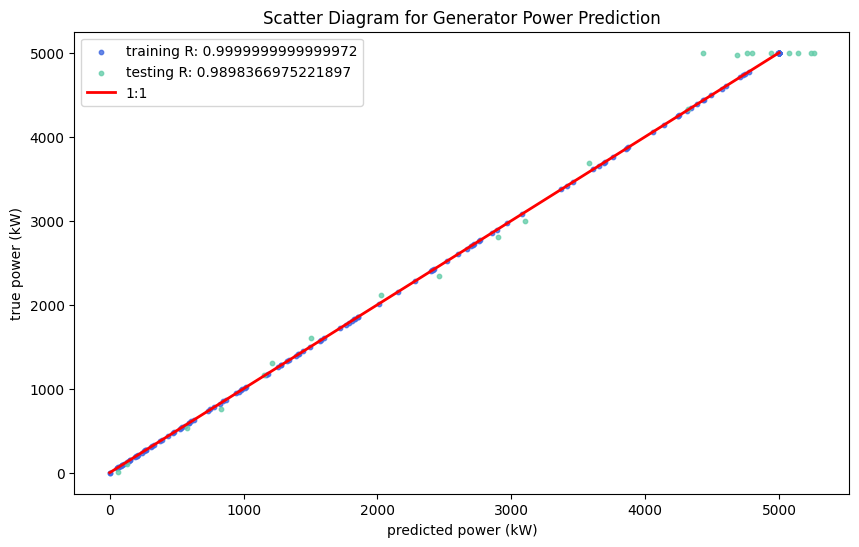

In [21]:
predicted_train = emulator.predict(X_train_sc)
predicted_test = emulator.predict(X_test_sc)

predict_train = predicted_train[:,0]
predict_test = predicted_test[:,0]

# Calculate R factor and mean-square-error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

error_training = np.sqrt(mean_squared_error(predict_train,y_train))
error_test = np.sqrt(mean_squared_error(predict_test,y_test))

corr_coef_train = r2_score(predict_train,y_train)
corr_coef_test = r2_score(predict_test,y_test)

print('RMSE training:',error_training)
print('RMSE testing:', error_test)
print('Correlation Coefficient training:',corr_coef_train)
print('Correlation Coefficient testing:', corr_coef_test)

# Plot the Results
l1 = "training R: "+str(corr_coef_train)
l2 = "testing R: "+str(corr_coef_test)
fig, ax = plt.subplots(1,1,figsize=(10, 6))
ax.scatter(predict_train, y_train, color="royalblue", label=l1, s=10,alpha = 0.8)
ax.scatter(predict_test, y_test, color="mediumaquamarine", label=l2, s=10,alpha = 0.8)
ax.plot([y_train.min(),y_train.max()],[y_train.min(),y_train.max()],color = "red", label = "1:1", linewidth=2)
ax.set_xlabel("predicted power (kW)")
ax.set_ylabel("true power (kW)")
ax.set_title("Scatter Diagram for Generator Power Prediction")
ax.legend()
plt.show()

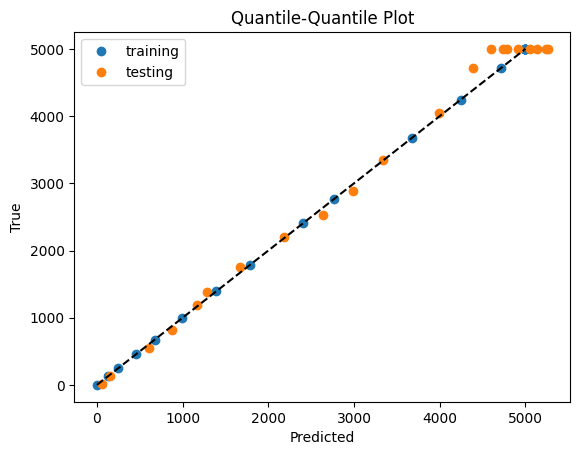

In [22]:
a = predict_train
b = y_train

c = predict_test
d = y_test

percs = np.linspace(0,100,21)
qn_a = np.percentile(a, percs)
qn_b = np.percentile(b, percs)
qn_c = np.percentile(c, percs)
qn_d = np.percentile(d, percs)

plt.plot(qn_a,qn_b, ls="", marker="o",label = "training")
plt.plot(qn_c,qn_d, ls="", marker="o",label = "testing")

x = np.linspace(np.min((qn_a.min(),qn_b.min())), np.max((qn_a.max(),qn_b.max())))
plt.plot(x,x, color="k", ls="--")
plt.title("Quantile-Quantile Plot")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.legend()
plt.show()

It improved performance remarkably!